## Creating artifical data

We can use $\mu + \sigma$ `scipy.stats.norm.rvs()` to create random values of a normal distribution.

To further add normal distributed (Gaussian) noise, we add $\alpha$ times `scipy.stats.norm.rvs()`:

$\mu + \sigma$ `scipy.stats.norm.rvs()` + $\alpha$ `scipy.stats.norm.rvs()`

Only part of the variance 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns
sns.set(style="darkgrid")



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


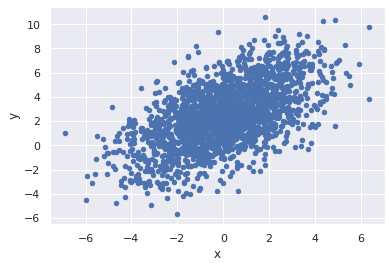

In [2]:
df = pd.DataFrame(columns=['x','y'])

X = 2*scipy.stats.norm.rvs(size=2000)
#Only part of the variance of Y can be explained by X:
Y = 2.5 + 0.75*X + 2*scipy.stats.norm.rvs(size=2000)

df['x']=X
df['y']=Y

df.plot.scatter(x='x', y='y')

## Manual OLS with pandas

We can manually calculate the parameters for a linear regression:

Slope estimate: $ \hat{\beta}_1 = \dfrac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$

Intercept estimate: $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$,

where $\bar{x}, \bar{y}$ are the sample means. 



In [3]:
x_mean = df['x'].mean()
y_mean = df['y'].mean()

beta_1 = sum( (X-x_mean)*(Y-y_mean) ) / sum( np.power(X-x_mean,2))

beta_0 = y_mean - beta_1*x_mean

print(beta_0, beta_1)

2.4264201864136683 0.7306291737749133


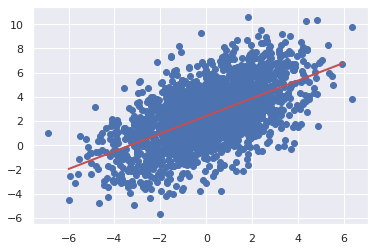

In [4]:
import matplotlib.pyplot as plt


x_line = np.linspace(-6,6,100)
y_line = beta_0 + beta_1 * x_line

plt.scatter(X,Y)
plt.plot(x_line, y_line, c='r', lw=2)

## Manual OLS with seaborn

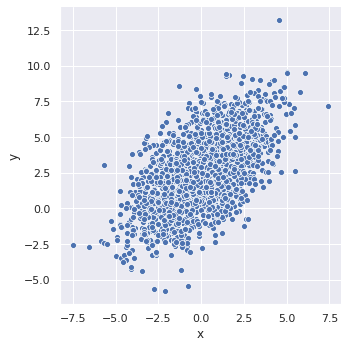

In [5]:
X = 2*scipy.stats.norm.rvs(size=2000)
#Only part of the variance of Y can be explained by X:
Y = 2.5 + 0.75*X + 2*scipy.stats.norm.rvs(size=2000)

df = pd.DataFrame({'x': X,'y': Y})

sns.relplot(x='x', y='y', data=df)

In [6]:
x_mean = df['x'].mean()
y_mean = df['y'].mean()

beta_1 = sum( (df['x']-x_mean)*(df['y']-y_mean) ) / sum( (df['x']-x_mean)**2)

beta_0 = y_mean - beta_1*x_mean

print(beta_0, beta_1)

2.5474998782218274 0.7271252087140999


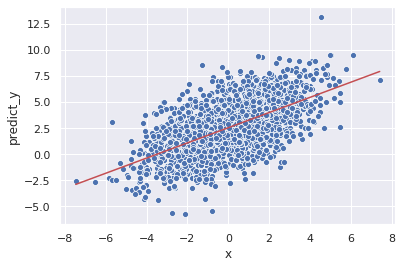

In [20]:
df['predict_y'] = beta_0 + beta_1 * df['x']

sns.scatterplot(x='x', y='y', data=df)
sns.lineplot(x='x', y='predict_y', data=df, color='r')

## OLS with sklearn

`sklearn` is one of the most popular machine learning packages and is basically a one-stop-shop for data science.

We can use the `LinearRegression()` class and the `fit()` function to create a linear regression automatically. 

Note: `fit()` requires whole dataframes as inputs *or* real numpy values. This is because this class also supports multivariate linear regression.

In [8]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(df[['x']], df[['y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can access the fitted slope by using `coef_` and the fitted intercept by using `intercept_`.

In [12]:
print(model.coef_[0][0])
print(model.intercept_[0])

0.7271252087140989
2.5474998782218274


We can use `predict()` to pass a new value and predict its corresponding y-value.

Note: `predict()` expects an array as input

In [21]:
print(model.predict([[4]]))
#this should yield the intercept:
print(model.predict([[0]]))

[[5.45600071]]
[[2.54749988]]


We can now draw the predicted data line, by passing the `x`-values to `predict()` as a vector.

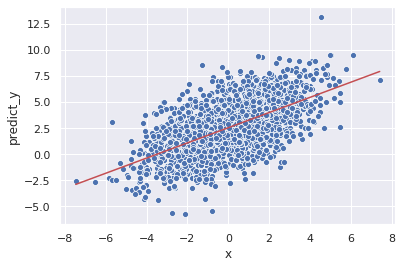

In [24]:
df['predict_y'] = model.predict(df[['x']]).reshape(-1)

sns.scatterplot(x='x', y='y', data=df)
sns.lineplot(x='x', y='predict_y', data=df, color='r')

Alternatively, for a very fast implementation, we can use seaborns `regplot()` for an immediate plot of the data and the corresponding linear regression line.

The shaddy parts around the line show our confidence in the estimated slope.

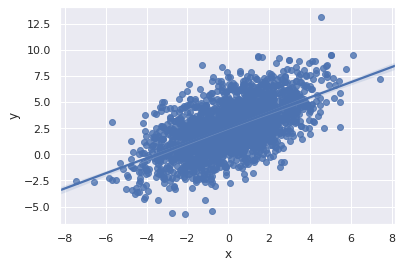

In [27]:
sns.regplot(x='x', y='y', data=df)